# Data Preparation and EDA

## Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation
Load and join data, clean up missing and all 0 values. Do this for both sequential and non-sequential data.

### Load and join sequential data

In [2]:
# Load Sequential data except Honos
df1 = pd.read_csv('Seq_Accepted_from2010.csv')
df2 = pd.read_csv('Seq_Discharge_from2010.csv')
df3 = pd.read_csv('Seq_Diagnosis_from2010.csv')
df4 = pd.read_csv('Seq_AreaLevelDeprivation_from2010.csv')
df5 = pd.read_csv('Seq_Comorbidities_from2010.csv')
df6 = pd.read_csv('Seq_Medication_from2010.csv')
df7 = pd.read_csv('Seq_DNA_from2010.csv')
df8 = pd.read_csv('Seq_F2F_from2010.csv')
df9 = pd.read_csv('Seq_Inpatient_from2010.csv')

In [3]:
# Join dataframes together
df = pd.merge(df1, df2, how='outer', on=['BrcId','Date','Event_type']) 
df = pd.merge(df, df3, how='outer', on=['BrcId','Date','Event_type']) 
df = pd.merge(df, df4, how='outer', on=['BrcId','Date','Event_type']) 
df = pd.merge(df, df5, how='outer', on=['BrcId','Date','Event_type', 'Primary_Diag', 'Trimmed_Primary_Diag']) 
df = pd.merge(df, df6, how='outer', on=['BrcId','Date','Event_type']) 
df = pd.merge(df, df7, how='outer', on=['BrcId','Date','Event_type'])
df = pd.merge(df, df8, how='outer', on=['BrcId','Date','Event_type'])
df = pd.merge(df, df9, how='outer', on=['BrcId','Date','Event_type'])

In [4]:
# Check row and column count
df.shape

(267519, 68)

In [5]:
# Load HoNOS files
df10 = pd.read_csv('Seq_Honos_from2010.csv')
df11 = pd.read_csv('Seq_Honos65_from2010.csv')
df12 = pd.read_csv('Seq_Honos_abi_from2010.csv')
df13 = pd.read_csv('Seq_Honos_Secure_from2010.csv')

In [6]:
# Join all Honos data together
df_Honos = pd.concat([df10, df11, df12, df13])

In [7]:
# Check row and column count
df_Honos.shape

(27011, 18)

In [8]:
# Merge df and df_honos dataframes
df = pd.merge(df, df_Honos, how='outer', on=['BrcId','Date','Event_type'])

In [9]:
# Check row and column count
df.shape

(294530, 83)

In [10]:
# Load additional non-sequential files
df14 = pd.read_csv('Symptoms_from2007.csv')
df15 = pd.read_csv('RiskAssessmentOld_from2010.csv')
df16 = pd.read_csv('RiskAssessmentNew_from2010.csv')
df17 = pd.read_csv('Demographics_from2010.csv')

In [11]:
# Merge df and additional non-sequential dataframes 
df = pd.merge(df, df14, how='left', on=['BrcId'])
df = pd.merge(df, df15, how='left', on=['BrcId'])
df = pd.merge(df, df16, how='left', on=['BrcId'])
df = pd.merge(df, df17, how='left', on=['BrcId'])

In [12]:
# Check row and column count
df.shape

(294530, 135)

In [13]:
# Put in order of patient ID and date
df = df.sort_values(by=['BrcId','Date']).reset_index()

In [14]:
# Remove previous index column
df = df.iloc[:,1:]

### Cleanup sequential data - missing and all 0 values

In [15]:
# Review medication columns with all 0's and NaNs
df[(df['Doxepin']==1) | (df['Isocarboxazid']==1) | (df['Nefazodone']==1) | (df['Oxitriptan']==1) 
  | (df['Tranylcypromine']==1) | (df['Triptafen']==1)  | (df['Tryptophan']==1) ]

,BrcId,Date,Event_type,GP,Home,Primary_Diag,Trimmed_Primary_Diag,F33,F330,F331,...,OtherAsian,Irish,Indian,Pakistani,WhiteBlackCaribbean,OtherMixed,Bangladeshi,Chinese,WhiteBlackAfrican,WhiteAsian


In [16]:
# Remove medication columns with all 0's and NaNs
df.drop(columns=['Doxepin','Isocarboxazid','Nefazodone','Oxitriptan','Tranylcypromine',
                'Triptafen','Tryptophan'] , inplace=True)

In [17]:
# Check columns with missing values
df.isna().sum().to_frame()

,0
BrcId,0
Date,0
Event_type,0
GP,279145
Home,279145
Primary_Diag,270621
Trimmed_Primary_Diag,270621
F33,274767
F330,274767
F331,274767


In [18]:
# Convert Honos 'Missing' values in numerical columns to -1
df.loc[df['Honos_Scale1']=='Missing', 'Honos_Scale1']=-1
df.loc[df['Honos_Scale2']=='Missing', 'Honos_Scale2']=-1
df.loc[df['Honos_Scale3']=='Missing', 'Honos_Scale3']=-1
df.loc[df['Honos_Scale4']=='Missing', 'Honos_Scale4']=-1
df.loc[df['Honos_Scale5']=='Missing', 'Honos_Scale5']=-1
df.loc[df['Honos_Scale6']=='Missing', 'Honos_Scale6']=-1
df.loc[df['Honos_Scale7']=='Missing', 'Honos_Scale7']=-1
df.loc[df['Honos_Scale8']=='Missing', 'Honos_Scale8']=-1
df.loc[df['Honos_Scale9']=='Missing', 'Honos_Scale9']=-1
df.loc[df['Honos_Scale10']=='Missing', 'Honos_Scale10']=-1
df.loc[df['Honos_Scale11']=='Missing', 'Honos_Scale11']=-1
df.loc[df['Honos_Scale12']=='Missing', 'Honos_Scale12']=-1
df.loc[df['Honos_Adjusted_Total']=='Missing', 'Honos_Adjusted_Total']=-1

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [19]:
# Remove Honos Scale 8 Type and other redundant columns
df = df.drop(columns=['Honos_Scale8_Type', 'Gender_ID', 'Marital_Status_ID', 'ethnicitycleaned', 'Primary_Diag',
                     'Secondary_Diag_1','Secondary_Diag_2', 'Secondary_Diag_3', 'Trimmed_Primary_Diag',
                     'Trimmed_Secondary_Diag_1', 'Trimmed_Secondary_Diag_2', 'Trimmed_Secondary_Diag_3'])

### Normalise continuous sequential data
Adapted from a blogpost by Jason Brownlee (2019) called 'How to Normalize and Standardize Time Series Data in Python'

In [20]:
# Look at IMD score stats
df['IMD_score'].describe()

count    19192.000000
mean        28.782492
std         10.925723
min          1.359000
25%         20.650000
50%         29.001000
75%         37.142000
max         73.376000
Name: IMD_score, dtype: float64

In [21]:
# Normalise IMD score
IMD_min = df['IMD_score'].min()
IMD_max = df['IMD_score'].max()
df['IMD_score'] = (df['IMD_score'] - IMD_min)/(IMD_max - IMD_min)
df['IMD_score'].describe()

count    19192.000000
mean         0.380792
std          0.151710
min          0.000000
25%          0.267867
50%          0.383826
75%          0.496869
max          1.000000
Name: IMD_score, dtype: float64

In [22]:
# Look at Age stats
df['Age'].describe()

count    294519.000000
mean         50.471572
std          18.713739
min          18.000000
25%          35.000000
50%          47.000000
75%          62.000000
max         112.000000
Name: Age, dtype: float64

In [23]:
# Normalise Age
Age_min = df['Age'].min()
Age_max = df['Age'].max()
df['Age'] = (df['Age'] - Age_min)/(Age_max - Age_min)
df['Age'].describe()

count    294519.000000
mean          0.345442
std           0.199082
min           0.000000
25%           0.180851
50%           0.308511
75%           0.468085
max           1.000000
Name: Age, dtype: float64

In [24]:
# Look at number of Inpatient days stats
df['Num_Inpatient_Days'].describe()

count    1903.000000
mean       30.617972
std        49.902783
min         0.000000
25%         4.500000
50%        12.000000
75%        34.000000
max       664.000000
Name: Num_Inpatient_Days, dtype: float64

In [25]:
# Normalise Inpatient Days
Inp_min = df['Num_Inpatient_Days'].min()
Inp_max = df['Num_Inpatient_Days'].max()
df['Num_Inpatient_Days'] = (df['Num_Inpatient_Days'] - Inp_min)/(Inp_max - Inp_min)
df['Num_Inpatient_Days'].describe()

count    1903.000000
mean        0.046111
std         0.075155
min         0.000000
25%         0.006777
50%         0.018072
75%         0.051205
max         1.000000
Name: Num_Inpatient_Days, dtype: float64

In [26]:
# Look at Honos Total stats
df['Honos_Total'].describe()

count    27011.000000
mean        10.447929
std          5.569817
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         39.000000
Name: Honos_Total, dtype: float64

In [27]:
# Normalise Honos Total
HT_min = df['Honos_Total'].min()
HT_max = df['Honos_Total'].max()
df['Honos_Total'] = (df['Honos_Total'] - HT_min)/(HT_max - HT_min)
df['Honos_Total'].describe()

count    27011.000000
mean         0.267896
std          0.142816
min          0.000000
25%          0.153846
50%          0.256410
75%          0.358974
max          1.000000
Name: Honos_Total, dtype: float64

In [28]:
# Look at Honos Adjusted Total stats
df['Honos_Adjusted_Total'].describe()

count    27011.000000
mean        10.953852
std          8.287596
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         99.000000
Name: Honos_Adjusted_Total, dtype: float64

In [29]:
# Normalise Honos Adjusted Total
HAT_min = df['Honos_Adjusted_Total'].min()
HAT_max = df['Honos_Adjusted_Total'].max()
df['Honos_Adjusted_Total'] = (df['Honos_Adjusted_Total'] - HAT_min)/(HAT_max - HAT_min)
df['Honos_Adjusted_Total'].describe()

count    27011.000000
mean         0.110645
std          0.083713
min          0.000000
25%          0.060606
50%          0.101010
75%          0.141414
max          1.000000
Name: Honos_Adjusted_Total, dtype: float64

In [30]:
# Impute missing numerical values with -1 
df.fillna(-1, inplace=True)

### Load and join non-sequential data

In [31]:
# Load Patients Initial data 
df_nonSeq = pd.read_csv('Patients_initial_from2010.csv')

# Load files with 1-1 relationship to patients
ALD = pd.read_csv('AreaLevelDeprivation_from2010.csv')
df_C1 = pd.read_csv('History_Bipolar_from2010.csv')
df_C2 = pd.read_csv('History_Manic_from2010.csv')
df_C3 = pd.read_csv('History_Organic_from2010.csv')
df_C4 = pd.read_csv('History_Schizophrenia_from2010.csv')
df_C5 = pd.read_csv('History_Substance_from2010.csv')
df_Psy = pd.read_csv('PsychoticSymptoms_from2010.csv')
df_Symptoms = pd.read_csv('Symptoms_from2007.csv')
df_F2F = pd.read_csv('Face2FaceContact_from2010.csv')
df_DNA = pd.read_csv('Num_DNAs_6M_from2010.csv')
df_RA1 = pd.read_csv('RiskAssessmentOld_from2010.csv')
df_RA2 = pd.read_csv('RiskAssessmentNew_from2010.csv')
df_Inp = pd.read_csv('InpatientDays_from2010.csv')
df_Med_onehot = pd.read_csv('Medication_onehot_from2010.csv')

# Files with 1-Many relationship to patients
df_H1 = pd.read_csv('Honos_from2010.csv')
df_H2 = pd.read_csv('Honos65_from2010.csv')
df_H3 = pd.read_csv('Honos_abi_from2010.csv')
df_H4 = pd.read_csv('Honos_Secure_from2010.csv')
df_Med = pd.read_csv('Medication_from2010.csv')

In [32]:
# Shape of initial patient episodes - row count should not change after merging other dataframes
df_nonSeq.shape

(15383, 61)

In [33]:
# Join initial episodes with medication data
df_nonSeq_med = pd.merge(df_nonSeq, df_Med, how='left', on=['BrcId'])

In [34]:
# Check row count
df_nonSeq_med.shape

(15759, 98)

In [35]:
# Join all Honos data together
df_Honos2 = pd.concat([df_H1, df_H2, df_H3, df_H4])

In [36]:
# Check rowcount
df_Honos2.shape

(11159, 18)

In [37]:
# Some patients have multiple Honos records, e.g. in Honos and Honos65
# Remove duplicates by keeping the one with the latest date
df_Honos2_unique = df_Honos2[df_Honos2.groupby('BrcId').Honos_date.transform('max') == df_Honos2['Honos_date']]

In [38]:
# Check row count
df_Honos2_unique.shape

(10978, 18)

In [39]:
# Still some duplicates, as some are taken by the same patient on the same day, so keeping unique patients only
df_Honos2_unique = df_Honos2_unique.drop_duplicates(subset='BrcId')

In [40]:
# Check rowcount
df_Honos2_unique.shape

(10971, 18)

In [41]:
# Join initial episodes with Honos
df_nonSeq = pd.merge(df_nonSeq, df_Honos2_unique, how='left', on=['BrcId'])

In [42]:
# Check rowcount
df_nonSeq.shape

(15383, 78)

In [43]:
# Merge Comorbidities with initial episodes 
df_nonSeq = pd.merge(df_nonSeq, df_C1, how='left', on=['BrcId'])
df_nonSeq = pd.merge(df_nonSeq, df_C2, how='left', on=['BrcId'])
df_nonSeq = pd.merge(df_nonSeq, df_C3, how='left', on=['BrcId'])
df_nonSeq = pd.merge(df_nonSeq, df_C4, how='left', on=['BrcId'])
df_nonSeq = pd.merge(df_nonSeq, df_C5, how='left', on=['BrcId'])

In [44]:
# Check rowcount
df_nonSeq.shape

(15383, 83)

In [45]:
# Merge Symptoms 
df_nonSeq = pd.merge(df_nonSeq, df_Psy, how='left', on=['BrcId'])
df_nonSeq = pd.merge(df_nonSeq, df_Symptoms, how='left', on=['BrcId'])

In [46]:
# Check rowcount
df_nonSeq.shape

(15383, 104)

In [47]:
# Merge Medication one hot file 
df_nonSeq = pd.merge(df_nonSeq, df_Med_onehot, how='left', on=['BrcId'])

In [48]:
# Check rowcount
df_nonSeq.shape

(15383, 135)

In [49]:
# Merge Events and Inpatient data 
df_nonSeq = pd.merge(df_nonSeq, df_F2F, how='left', on=['BrcId'])
df_nonSeq = pd.merge(df_nonSeq, df_DNA, how='left', on=['BrcId'])
df_nonSeq = pd.merge(df_nonSeq, df_Inp, how='left', on=['BrcId'])

In [50]:
# Check rowcount
df_nonSeq.shape

(15383, 138)

In [51]:
# Merge Risk Assessment data 
df_nonSeq = pd.merge(df_nonSeq, df_RA1, how='left', on=['BrcId'])
df_nonSeq = pd.merge(df_nonSeq, df_RA2, how='left', on=['BrcId'])

In [52]:
# Check rowcount
df_nonSeq.shape

(15383, 140)

In [53]:
# Merge ALD data 
df_nonSeq = pd.merge(df_nonSeq, ALD, how='left', on=['BrcId'])

In [54]:
# Check rowcount
df_nonSeq.shape

(15383, 141)

### Cleanup non-sequential data - missing values

In [55]:
# Review medication columns with all 0's and NaNs
df_nonSeq[(df_nonSeq['Doxepin']==1) | (df_nonSeq['Isocarboxazid']==1) | (df_nonSeq['Nefazodone']==1) 
          | (df_nonSeq['Oxitriptan']==1)  | (df_nonSeq['Tranylcypromine']==1) |
          (df_nonSeq['Triptafen']==1)  | (df_nonSeq['Tryptophan']==1) ]

,BrcId,Initial_primary_diagnosis,Trimmed_Primary_Diag,F33,F330,F331,F332,F333,F334,F338,...,Triptafen,Tryptophan,Venlafaxine,Vortioxetine,Num_F2F_events_6M,Num_DNAs_6M,Num_Inpatient_Days,RA_Old_SI_Selfharm,RA_New_SI_Selfharm,Avg_IMD_Score


In [56]:
# Remove medication columns with all 0's and NaNs
df_nonSeq.drop(columns=['Doxepin','Isocarboxazid','Nefazodone','Oxitriptan','Tranylcypromine',
                'Triptafen','Tryptophan'] , inplace=True)

In [57]:
# Remove medication columns in medication dataframe with all 0's and NaNs
df_nonSeq_med.drop(columns=['Doxepin','Isocarboxazid','Nefazodone','Oxitriptan','Tranylcypromine',
                'Triptafen','Tryptophan'] , inplace=True)

In [58]:
# Check columns with missing values
df_nonSeq.isna().sum().to_frame()

,0
BrcId,0
Initial_primary_diagnosis,0
Trimmed_Primary_Diag,0
F33,0
F330,0
F331,0
F332,0
F333,0
F334,0
F338,0


In [59]:
# Convert Honos 'Missing' values in numerical columns to -1
df_nonSeq.loc[df_nonSeq['Honos_Scale1']=='Missing', 'Honos_Scale1']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale2']=='Missing', 'Honos_Scale2']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale3']=='Missing', 'Honos_Scale3']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale4']=='Missing', 'Honos_Scale4']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale5']=='Missing', 'Honos_Scale5']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale6']=='Missing', 'Honos_Scale6']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale7']=='Missing', 'Honos_Scale7']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale8']=='Missing', 'Honos_Scale8']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale9']=='Missing', 'Honos_Scale9']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale10']=='Missing', 'Honos_Scale10']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale11']=='Missing', 'Honos_Scale11']=-1
df_nonSeq.loc[df_nonSeq['Honos_Scale12']=='Missing', 'Honos_Scale12']=-1
df_nonSeq.loc[df_nonSeq['Honos_Adjusted_Total']=='Missing', 'Honos_Adjusted_Total']=-1

In [60]:
# Impute categorical values with 'Missing'
df_nonSeq['Honos_Scale8_Type'].fillna('Missing', inplace=True)
df_nonSeq['Gender_ID'].fillna('Missing', inplace=True)
df_nonSeq['Marital_Status_ID'].fillna('Missing', inplace=True)
df_nonSeq['ethnicitycleaned'].fillna('Missing', inplace=True)

In [61]:
# Impute categorical values in Med df with 'Missing'
df_nonSeq_med['gazetteer'].fillna('Missing', inplace=True)
df_nonSeq_med['core_term'].fillna('Missing', inplace=True)
df_nonSeq_med['Antidepressant_generic'].fillna('Missing', inplace=True)

In [62]:
# Impute missing dates with 01-jan-1900
df_nonSeq['Honos_date'].fillna('01-jan-1900', inplace=True)
df_nonSeq_med['Medication_Start_Date'].fillna('01-jan-1900', inplace=True)
df_nonSeq_med['Medication_End_Date'].fillna('01-jan-1900', inplace=True)

## EDA

### How are people being discharged?

In [63]:
# Load discharge data
discharge = pd.read_csv('Discharge_full_list.csv')

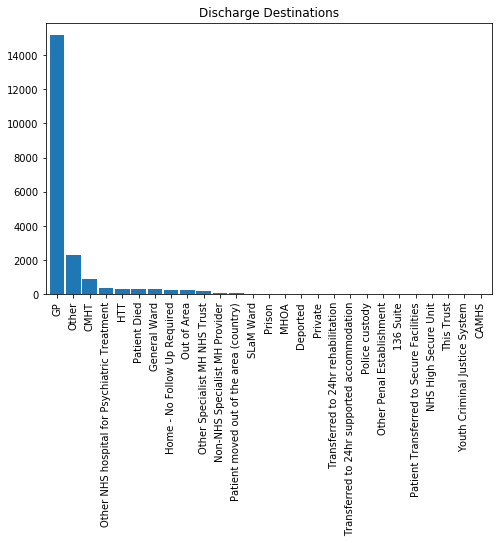

In [64]:
# Look at how people are being discharged
# Vast majority are discharged to GP
discharge['Discharge_Destination_ID'].value_counts().plot(kind='bar', figsize=(8,5), width=0.9);
plt.title('Discharge Destinations');

### How often are people relapsing / being re-referred?

In [65]:
# Load re-referral count data
re_referrals_12M = pd.read_csv('Rereferral_Count_12M_from2010.csv')
re_referrals_24M = pd.read_csv('Rereferral_Count_24M_from2010.csv')
re_referrals_All = pd.read_csv('Rereferral_Count_All_from2010.csv')

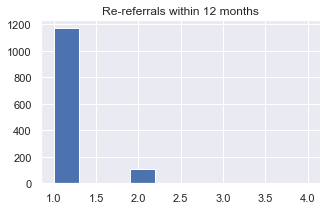

In [66]:
# Look at distribution of re-referrals over 12M for all patients
# Majority are only returning once, with a small number returning 2 times
sns.set(rc={'figure.figsize':(5,3)}) 
re_referrals_12M['Count_Rereferral'].hist();
plt.title('Re-referrals within 12 months');

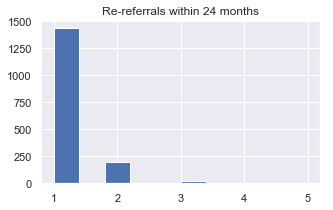

In [67]:
# Look at distribution of re-referrals over 24M for all patients
# Majority are only returning once, with a small number returning 2-3 times
re_referrals_24M['Count_Rereferral'].hist();
plt.title('Re-referrals within 24 months');

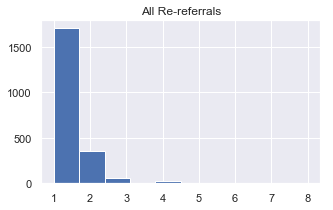

In [68]:
# Look at distribution of re-referrals over all time for all patients
# Majority are only returning once, with a small number returning 2-4 times
re_referrals_All['Count_Rereferral'].hist();
plt.title('All Re-referrals');

### How long do remission and relapse last?

In [69]:
# Load relapse data 
relapseAll = pd.read_csv('Patients_relapse_All_from2010.csv')

In [70]:
# Check relapseAll rowcount
relapseAll.shape

(2152, 11)

In [71]:
# Remove patients discharged after July 2016 from relapseAll df
relapse = relapseAll.drop(relapseAll[relapseAll.Initial_discharge_date > '2016-07_31'].index)

In [72]:
# Check relapseAll rowcount again
relapse.shape

(1774, 11)

In [73]:
# Look at all relapse and remission stats for patients accepted from Jan 2010 and discharged by July 2016
# mean remission = 547 days (~1 year 6 months)
# mean relapse = 250 days (~8 months)
# 55% of relapse group returns within 1 year
# 73% of relapse group returns within 2 years
# 83% of relapse group returns within 3 years
# Note that relapse group may be underestimated due to latest relapse period starting from July 2016
relapse.describe()

,BrcId,Num_days_in_remission,Num_days_in_relapse,relapse_All,relapse_in_12M,relapse_in_24M,relapse_in_36M,spell_num
count,1.774000e+03,1774.000000,1774.000000,1774.0,1774.000000,1774.000000,1774.000000,1774.0
mean,1.017226e+07,546.515220,250.643179,1.0,0.550169,0.726607,0.833145,1.0
std,7.627114e+04,632.031499,347.384777,0.0,0.497617,0.445827,0.372951,0.0
min,1.000054e+07,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0
25%,1.014540e+07,83.250000,34.000000,1.0,0.000000,0.000000,1.000000,1.0
50%,1.017778e+07,293.500000,130.000000,1.0,1.000000,1.000000,1.000000,1.0
75%,1.021765e+07,791.000000,315.000000,1.0,1.000000,1.000000,1.000000,1.0
max,1.032654e+07,3383.000000,2640.000000,1.0,1.000000,1.000000,1.000000,1.0


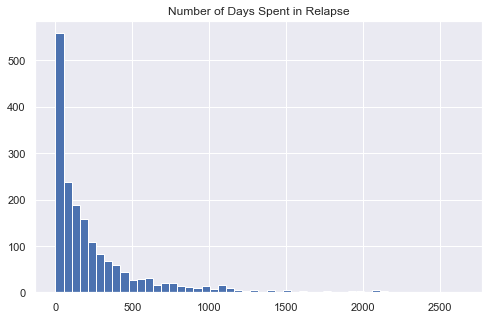

In [74]:
# Look at relapse distribution - how many days people spend in relapse
relapse['Num_days_in_relapse'].hist(bins = 50,figsize=(8,5));
plt.title('Number of Days Spent in Relapse');

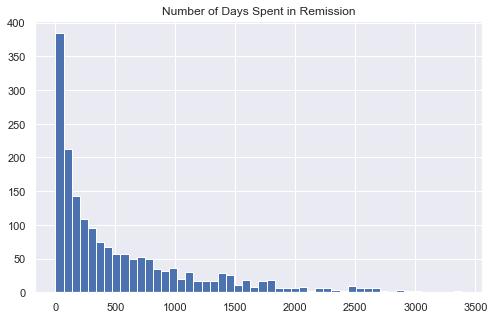

In [75]:
# Look at remission distribution - how many days people spend in remission
relapse['Num_days_in_remission'].hist(bins = 50,figsize=(8,5));
plt.title('Number of Days Spent in Remission');

### Decision - use Target of 2 years, Remove patients discharged after July 2017
Patients removed to allow for 2 year prediction window

In [76]:
# Get patient list to remove from sequential data
patients_remove = df_nonSeq['BrcId'][df_nonSeq.Initial_discharge_date > '2017-07_31']

In [77]:
# Check sequential rowcounts 
df.shape

(294530, 116)

In [78]:
# Drop patients discharged after July 2017 from sequential data
df.drop(df[df['BrcId'].isin(patients_remove)].index,inplace=True)

In [79]:
# Check sequential rowcounts again
df.shape

(216563, 116)

In [80]:
# Check rowcount for nonSeq
df_nonSeq.shape

(15383, 134)

In [81]:
# Remove patients discharged after July 2017 for analysis
df_nonSeq.drop(df_nonSeq[df_nonSeq.Initial_discharge_date > '2017-07_31'].index, inplace=True)

In [82]:
# Check rowcount again
df_nonSeq.shape

(11971, 134)

In [83]:
# Check rowcount from df_nonSeq_med
df_nonSeq_med.shape

(15759, 91)

In [84]:
# Remove patients discharged after July 2017 for analysis
df_nonSeq_med.drop(df_nonSeq_med[df_nonSeq_med.Initial_discharge_date > '2017-07_31'].index, inplace=True)

In [85]:
# Check rowcount again
df_nonSeq_med.shape

(12259, 91)

In [86]:
# Check relapseAll rowcount
relapseAll.shape

(2152, 11)

In [87]:
# Remove patients discharged after July 2017 from relapseAll df
relapseAll.drop(relapseAll[relapseAll.Initial_discharge_date > '2017-07_31'].index, inplace=True)

In [88]:
# Check relapseAll rowcount again
relapseAll.shape

(1958, 11)

### What do the other timeframes look like?

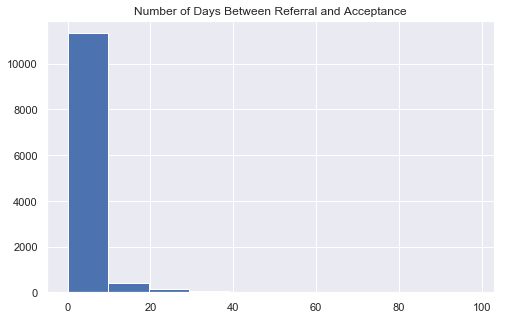

In [89]:
# Look number of days between being referred and being accepted 
df_nonSeq[(df_nonSeq['num_days_to_initial_accepted']<100)]['num_days_to_initial_accepted'].hist(figsize=(8,5));
plt.title('Number of Days Between Referral and Acceptance');

In [90]:
df_nonSeq['num_days_to_initial_accepted'].describe()

count    11971.000000
mean         3.559018
std        133.834020
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      14610.000000
Name: num_days_to_initial_accepted, dtype: float64

In [91]:
# Check for patients with more than 1 month between referral and acceptance
df_nonSeq[(df_nonSeq['num_days_to_initial_accepted']>30)].count()

BrcId                        113
Initial_primary_diagnosis    113
Trimmed_Primary_Diag         113
F33                          113
F330                         113
                            ... 
Num_DNAs_6M                   32
Num_Inpatient_Days             0
RA_Old_SI_Selfharm             7
RA_New_SI_Selfharm             1
Avg_IMD_Score                113
Length: 134, dtype: int64

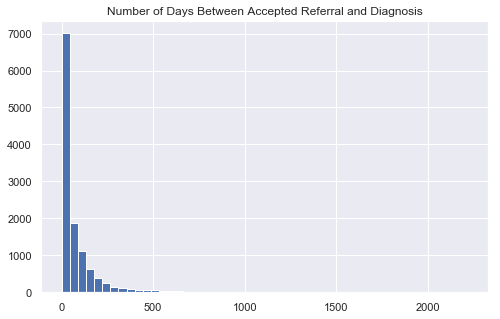

In [92]:
# Look number of days between initial referral being accepted and diagnosis
df_nonSeq['num_days_to_initial_diagnosis'].hist(bins = 50,figsize=(8,5));
plt.title('Number of Days Between Accepted Referral and Diagnosis');

In [93]:
# Check for patients with more than 3 months between accepted and diagnosis
df_nonSeq[(df_nonSeq['num_days_to_initial_diagnosis']>90)].count()

BrcId                        3038
Initial_primary_diagnosis    3038
Trimmed_Primary_Diag         3038
F33                          3038
F330                         3038
                             ... 
Num_DNAs_6M                  1171
Num_Inpatient_Days             59
RA_Old_SI_Selfharm            291
RA_New_SI_Selfharm             24
Avg_IMD_Score                3006
Length: 134, dtype: int64

In [94]:
df_nonSeq['num_days_to_initial_diagnosis'].describe()

count    11971.000000
mean        75.313675
std        128.517546
min          0.000000
25%          6.000000
50%         32.000000
75%         91.500000
max       2217.000000
Name: num_days_to_initial_diagnosis, dtype: float64

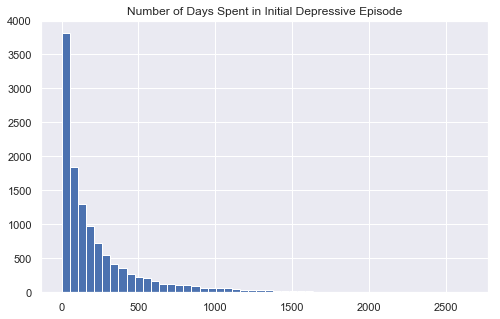

In [95]:
# Look number of days in initial episode
df_nonSeq['num_days_in_initial_episode'].hist(bins = 50,figsize=(8,5));
plt.title('Number of Days Spent in Initial Depressive Episode');

In [96]:
# Get summary stats on initial episode
# Mean number of days is 233 (~8 months)
df_nonSeq['num_days_in_initial_episode'].describe()

count    11971.000000
mean       233.126389
std        315.571875
min          0.000000
25%         34.000000
50%        118.000000
75%        292.500000
max       2640.000000
Name: num_days_in_initial_episode, dtype: float64

In [97]:
# Check for patients in initial episode >2000
df_nonSeq[df_nonSeq['num_days_in_initial_episode']>2000].count()

BrcId                        32
Initial_primary_diagnosis    32
Trimmed_Primary_Diag         32
F33                          32
F330                         32
                             ..
Num_DNAs_6M                   8
Num_Inpatient_Days            0
RA_Old_SI_Selfharm           15
RA_New_SI_Selfharm            0
Avg_IMD_Score                32
Length: 134, dtype: int64

In [98]:
# Check for patients in remission less than 7 days
relapseAll[relapseAll['Num_days_in_remission']<7].count()

BrcId                        81
Initial_discharge_date       81
Rereferral_accepted_date     81
Rereferral_discharge_date    81
Num_days_in_remission        81
Num_days_in_relapse          81
relapse_All                  81
relapse_in_12M               81
relapse_in_24M               81
relapse_in_36M               81
spell_num                    81
dtype: int64

In [99]:
# Check for patients in relapse more than 2000 days
relapseAll[relapseAll['Num_days_in_relapse']>2000].count()

BrcId                        12
Initial_discharge_date       12
Rereferral_accepted_date     12
Rereferral_discharge_date    12
Num_days_in_remission        12
Num_days_in_relapse          12
relapse_All                  12
relapse_in_12M               12
relapse_in_24M               12
relapse_in_36M               12
spell_num                    12
dtype: int64

### Look at distribution of categorical data

In [100]:
# Merge df_nonSeq and relapse dataframes to do some analysis
df_nonSeq_with_relapse = pd.merge(df_nonSeq, relapseAll, how='left', on=['BrcId'])

In [101]:
# Check shape
df_nonSeq_with_relapse.shape

(11971, 144)

In [102]:
# Populate non-relapse group with 0
df_nonSeq_with_relapse['relapse_in_24M'].fillna(0, inplace=True)

In [265]:
# Get count of Relapse 24M Group
df_nonSeq_with_relapse['relapse_in_24M'][(df_nonSeq_with_relapse['relapse_in_24M']==1.0)].count()

1467

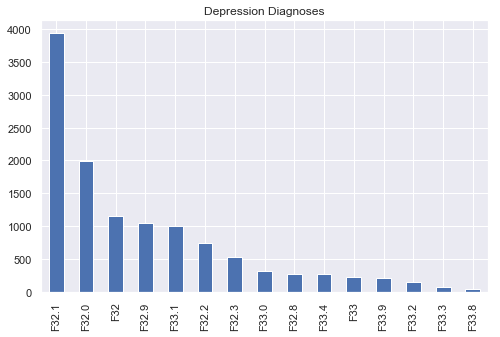

In [103]:
# Look at different initial Diagnoses
df_nonSeq_with_relapse['Trimmed_Primary_Diag'].value_counts().plot(kind='bar', figsize=(8,5));
plt.title('Depression Diagnoses');

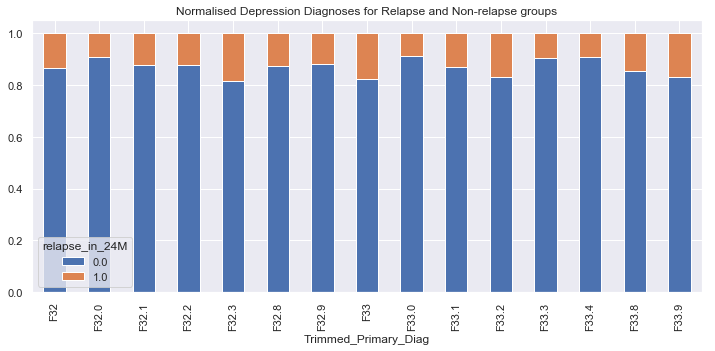

In [104]:
# Look at different initial Diagnoses for relapse and non-relapse
sns.set(rc={'figure.figsize':(12,5)}) 
diagnosis=df_nonSeq_with_relapse.groupby('Trimmed_Primary_Diag')['relapse_in_24M'].value_counts(normalize=True).unstack()
diagnosis.plot(kind='bar', stacked='True');
plt.title('Normalised Depression Diagnoses for Relapse and Non-relapse groups');

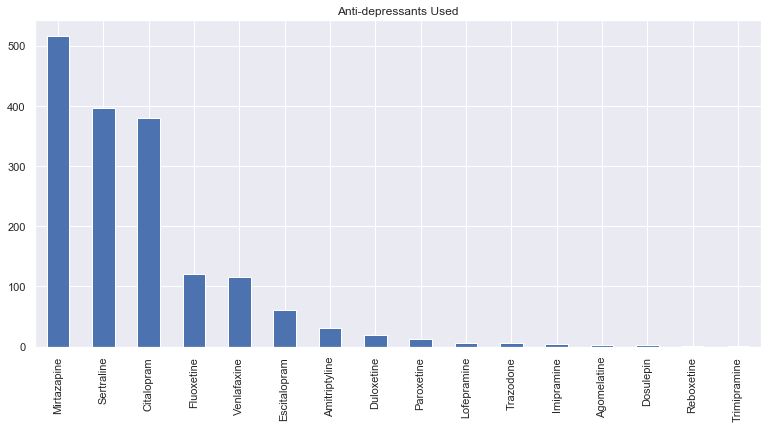

In [105]:
# Look at different Medication
df_nonSeq_med[df_nonSeq_med['gazetteer']!='Missing']['Antidepressant_generic'].value_counts().plot(kind='bar',figsize=(13,6));
plt.title('Anti-depressants Used');

In [106]:
# Merge df_med and relapse dataframes to do some analysis
df_med_with_relapse = pd.merge(df_nonSeq_med, relapseAll, how='left', on=['BrcId'])

In [107]:
# Populate non-relapse group with 0
df_med_with_relapse['relapse_in_24M'].fillna(0, inplace=True)

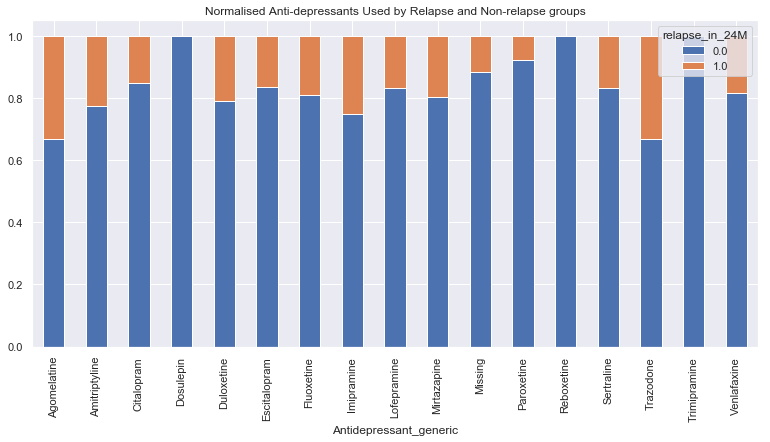

In [108]:
# Look at different Patient-Medication combination for relapse and non-relapse
sns.set(rc={'figure.figsize':(17,7)}) 
medication = df_med_with_relapse.groupby('Antidepressant_generic')['relapse_in_24M'].value_counts(normalize=True).unstack()
medication.plot(kind='bar', stacked='True', figsize=(13,6));
plt.title('Normalised Anti-depressants Used by Relapse and Non-relapse groups');

In [109]:
# Clean up Gender values
df_nonSeq['Gender_ID'][(df_nonSeq['Gender_ID'] == 'Other') 
                       | (df_nonSeq['Gender_ID'] == 'Not Specified') 
                       | (df_nonSeq['Gender_ID'] == 'Not Known')] = 'Other Not Stated'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [110]:
# Clean up Gender values
df_nonSeq_with_relapse['Gender_ID'][(df_nonSeq_with_relapse['Gender_ID'] == 'Other') 
                       | (df_nonSeq_with_relapse['Gender_ID'] == 'Not Specified') 
                       | (df_nonSeq_with_relapse['Gender_ID'] == 'Not Known')] = 'Other Not Stated'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


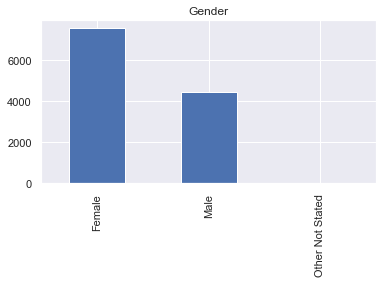

In [111]:
# Look at different Gender types
df_nonSeq['Gender_ID'].value_counts().plot(kind='bar', figsize=(6,3));
plt.title('Gender');

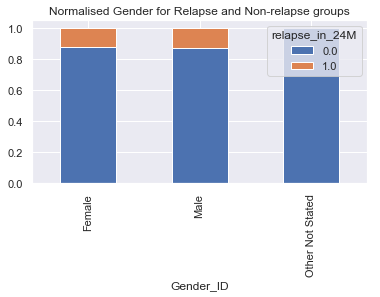

In [112]:
# Look at different Gender for relapse and no relapse
gender = df_nonSeq_with_relapse.groupby('Gender_ID')['relapse_in_24M'].value_counts(normalize=True).unstack()
gender.plot(kind='bar', stacked='True', figsize=(6,3));
plt.title('Normalised Gender for Relapse and Non-relapse groups');

In [113]:
# Clean up ethnicity values
df_nonSeq['ethnicitycleaned'][(df_nonSeq['ethnicitycleaned'] == 'Any other ethnic group (S)') 
                       | (df_nonSeq['ethnicitycleaned'] == 'Not Stated') 
                       | (df_nonSeq['ethnicitycleaned'] == 'Missing')] = 'Other Not Stated'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [114]:
# Clean up ethnicity values
df_nonSeq_with_relapse['ethnicitycleaned'][(df_nonSeq_with_relapse['ethnicitycleaned'] == 'Any other ethnic group (S)') 
                       | (df_nonSeq_with_relapse['ethnicitycleaned'] == 'Not Stated') 
                       | (df_nonSeq_with_relapse['ethnicitycleaned'] == 'Missing')] = 'Other Not Stated'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


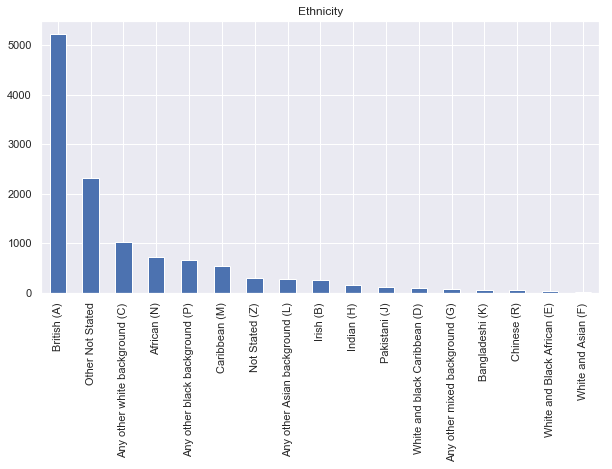

In [115]:
# Look at different ethnicity types
df_nonSeq['ethnicitycleaned'].value_counts().plot(kind='bar', figsize=(10,5));
plt.title('Ethnicity');

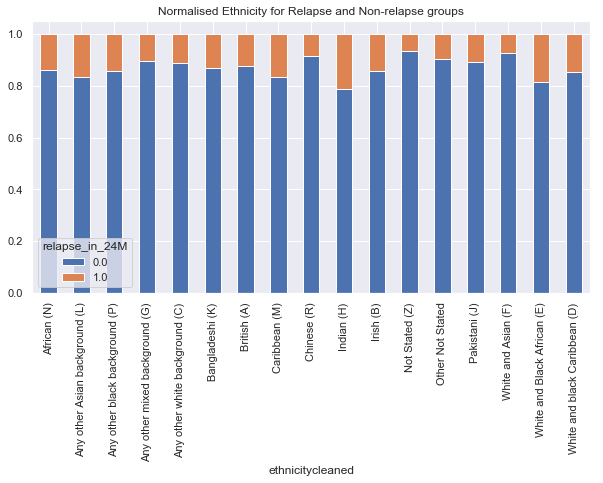

In [116]:
# Look at different ethnicity for relapse and no relapse
ethnicity = df_nonSeq_with_relapse.groupby('ethnicitycleaned')['relapse_in_24M'].value_counts(normalize=True).unstack()
ethnicity.plot(kind='bar', stacked='True', figsize=(10,5));
plt.title('Normalised Ethnicity for Relapse and Non-relapse groups');

In [117]:
# Clean up Marital Status values
df_nonSeq['Marital_Status_ID'][(df_nonSeq['Marital_Status_ID'] == 'Not Disclosed') 
                       | (df_nonSeq['Marital_Status_ID'] == 'Not Known')] = 'Not Stated'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
# Clean up Marital Status values
df_nonSeq_with_relapse['Marital_Status_ID'][(df_nonSeq_with_relapse['Marital_Status_ID'] == 'Not Disclosed') 
                       | (df_nonSeq_with_relapse['Marital_Status_ID'] == 'Not Known')] = 'Not Stated'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
# Clean up Marital Status values
df_nonSeq['Marital_Status_ID'][(df_nonSeq['Marital_Status_ID'] == 'Married/Civil Partner') 
                       | (df_nonSeq['Marital_Status_ID'] == 'Married')] = 'Married'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
# Clean up Marital Status values
df_nonSeq_with_relapse['Marital_Status_ID'][(df_nonSeq_with_relapse['Marital_Status_ID'] == 'Married/Civil Partner') 
                       | (df_nonSeq_with_relapse['Marital_Status_ID'] == 'Married')] = 'Married'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
# Clean up Marital Status values
df_nonSeq['Marital_Status_ID'][(df_nonSeq['Marital_Status_ID'] == 'Widowed/Surviving Civil Partner') 
                       | (df_nonSeq['Marital_Status_ID'] == 'Widowed')] = 'Widowed'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
# Clean up Marital Status values
df_nonSeq_with_relapse['Marital_Status_ID'][(df_nonSeq_with_relapse['Marital_Status_ID'] == 'Widowed/Surviving Civil Partner') 
                       | (df_nonSeq_with_relapse['Marital_Status_ID'] == 'Widowed')] = 'Widowed'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
# Clean up Marital Status values
df_nonSeq['Marital_Status_ID'][(df_nonSeq['Marital_Status_ID'] == 'Divorced/Civil Partnership Dissolved') 
                       | (df_nonSeq['Marital_Status_ID'] == 'Divorced')] = 'Divorced'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
# Clean up Marital Status values
df_nonSeq_with_relapse['Marital_Status_ID'][(df_nonSeq_with_relapse['Marital_Status_ID'] == 'Divorced/Civil Partnership Dissolved') 
                       | (df_nonSeq_with_relapse['Marital_Status_ID'] == 'Divorced')] = 'Divorced'

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


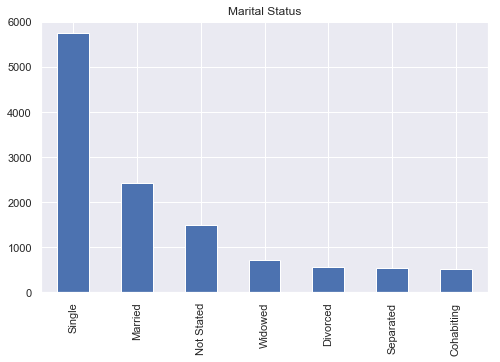

In [125]:
# Look at different Marital status types
df_nonSeq['Marital_Status_ID'].value_counts().plot(kind='bar', figsize=(8,5));
plt.title('Marital Status');

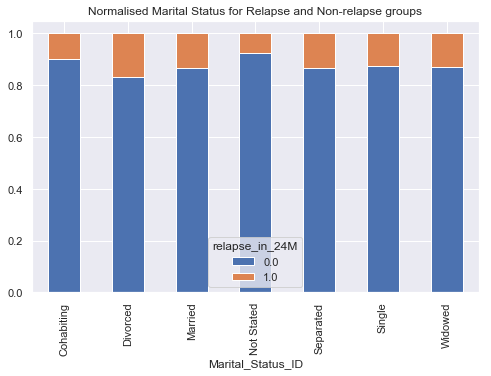

In [126]:
# Look at different Marital status for relapse and no relapse
marital = df_nonSeq_with_relapse.groupby('Marital_Status_ID')['relapse_in_24M'].value_counts(normalize=True).unstack()
marital.plot(kind='bar', stacked='True', figsize=(8,5));
plt.title('Normalised Marital Status for Relapse and Non-relapse groups');

### Look at distribution of numerical data

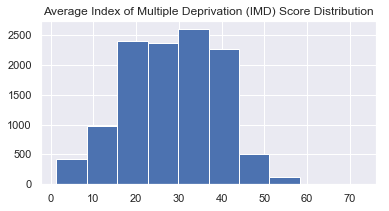

In [127]:
# Look at distribution of ALD
df_nonSeq[df_nonSeq['Avg_IMD_Score']!=-1]['Avg_IMD_Score'].hist(bins=10,figsize=(6,3));
plt.title('Average Index of Multiple Deprivation (IMD) Score Distribution');

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


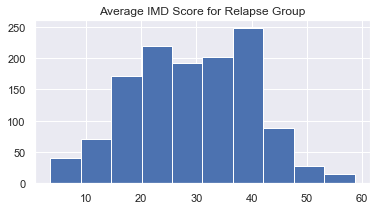

In [128]:
# Look at ALD for relapse 
df_nonSeq_with_relapse[(df_nonSeq['Avg_IMD_Score']!=-1) & (df_nonSeq_with_relapse['relapse_in_24M'] ==1)]['Avg_IMD_Score'].hist(bins = 10, figsize=(6,3))
plt.title('Average IMD Score for Relapse Group');

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


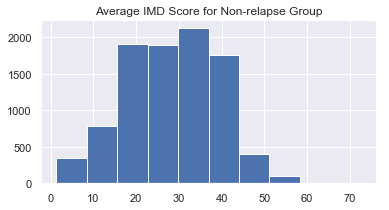

In [129]:
# Look at ALD for non-relapse
df_nonSeq_with_relapse[(df_nonSeq['Avg_IMD_Score']!=-1) & (df_nonSeq_with_relapse['relapse_in_24M'] ==0)]['Avg_IMD_Score'].hist(bins = 10, figsize=(6,3))
plt.title('Average IMD Score for Non-relapse Group');

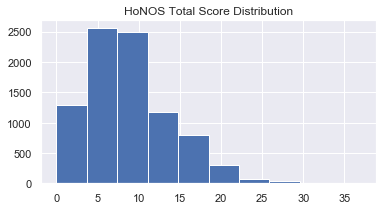

In [130]:
# Look at distribution of HoNOS
df_nonSeq[df_nonSeq['Honos_Total']!=-1]['Honos_Total'].hist(figsize=(6,3));
plt.title('HoNOS Total Score Distribution');

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


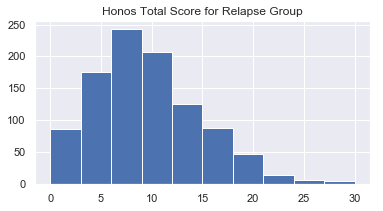

In [131]:
# Look at Honos scores for relapse 
df_nonSeq_with_relapse[(df_nonSeq['Honos_Total']!=-1)&(df_nonSeq_with_relapse['relapse_in_24M'] ==1)]['Honos_Total'].hist(bins = 10, figsize=(6,3))
plt.title('Honos Total Score for Relapse Group');

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


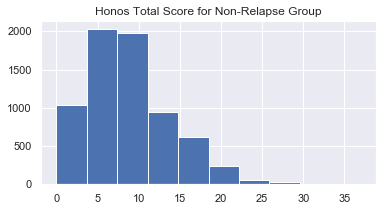

In [132]:
# Look at Honos scores for non-relapse
df_nonSeq_with_relapse[(df_nonSeq['Honos_Total']!=-1)&(df_nonSeq_with_relapse['relapse_in_24M'] ==0)]['Honos_Total'].hist(bins = 10, figsize=(6,3))
plt.title('Honos Total Score for Non-Relapse Group');

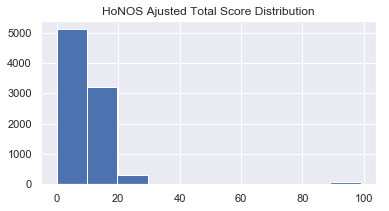

In [133]:
# Look at distribution of HoNOS
df_nonSeq[(df_nonSeq['Honos_Adjusted_Total']!=-1)]['Honos_Adjusted_Total'].hist(figsize=(6,3));
plt.title('HoNOS Ajusted Total Score Distribution');

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


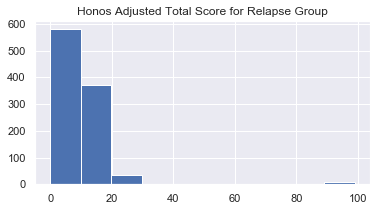

In [134]:
# Look at Honos Adjusted scores for relapse 
df_nonSeq_with_relapse[(df_nonSeq['Honos_Adjusted_Total']!=-1)&(df_nonSeq_with_relapse['relapse_in_24M'] ==1)]['Honos_Adjusted_Total'].hist(bins = 10, figsize=(6,3))
plt.title('Honos Adjusted Total Score for Relapse Group');

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


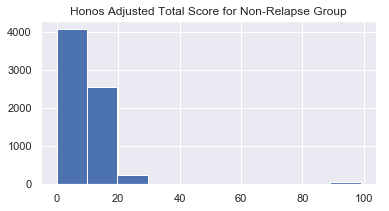

In [135]:
# Look at Honos Adjusted scores for non-relapse
df_nonSeq_with_relapse[(df_nonSeq['Honos_Adjusted_Total']!=-1)&(df_nonSeq_with_relapse['relapse_in_24M'] ==0)]['Honos_Adjusted_Total'].hist(bins = 10, figsize=(6,3))
plt.title('Honos Adjusted Total Score for Non-Relapse Group');

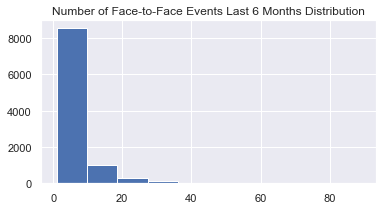

In [136]:
# Look at distribution of Face-to-face events
df_nonSeq[(df_nonSeq['Num_F2F_events_6M']!=-1)]['Num_F2F_events_6M'].hist(figsize=(6,3));
plt.title('Number of Face-to-Face Events Last 6 Months Distribution');

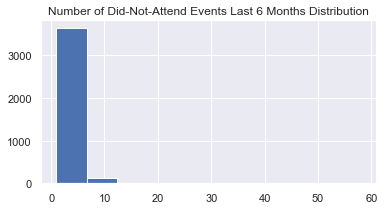

In [137]:
# Look at distribution of Did Not Attend 6M events
df_nonSeq[(df_nonSeq['Num_DNAs_6M']!=-1)]['Num_DNAs_6M'].hist(figsize=(6,3));
plt.title('Number of Did-Not-Attend Events Last 6 Months Distribution');

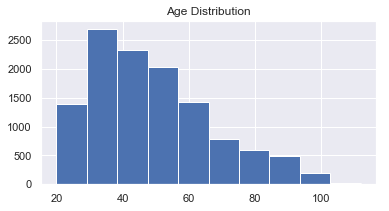

In [138]:
# Look at distribution of Age
df_nonSeq[(df_nonSeq['Age']!=-1)]['Age'].hist(bins=10,figsize=(6,3));
plt.title('Age Distribution');

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


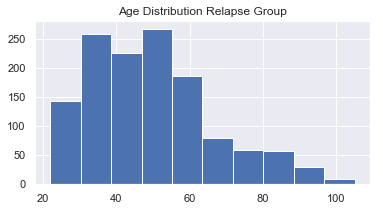

In [139]:
# Look at distribution of Age for relapse
df_nonSeq[(df_nonSeq['Age']!=-1)&(df_nonSeq_with_relapse['relapse_in_24M'] ==1)]['Age'].hist(bins=10,figsize=(6,3));
plt.title('Age Distribution Relapse Group');

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


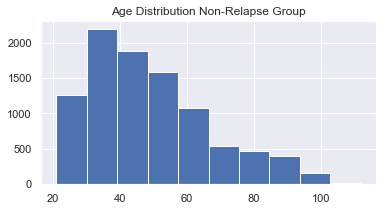

In [140]:
# Look at distribution of Age for non-relapse
df_nonSeq[(df_nonSeq['Age']!=-1)&(df_nonSeq_with_relapse['relapse_in_24M'] ==0)]['Age'].hist(bins=10,figsize=(6,3));
plt.title('Age Distribution Non-Relapse Group');

### Look at event types and counts per patient

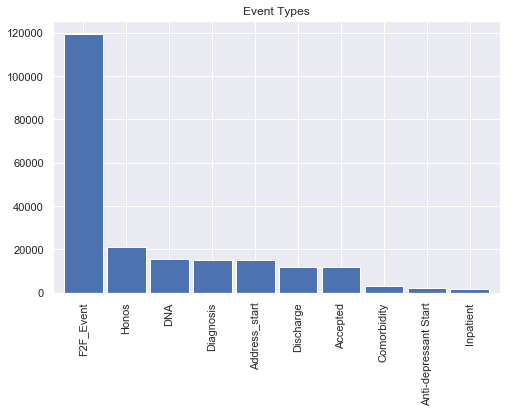

In [141]:
# Look at different Event types
# Most are face-to-face events
df['Event_type'].value_counts().plot(kind='bar', figsize=(8,5), width=0.9);
plt.title('Event Types');

In [142]:
# Merge df and relapse dataframes to do some analysis
df_with_relapse = pd.merge(df, relapseAll, how='left', on=['BrcId'])

In [143]:
# Check rowcounts
df.shape

(216563, 116)

In [144]:
# Populate the non-relapse group with 0
df_with_relapse.fillna(0, inplace=True)

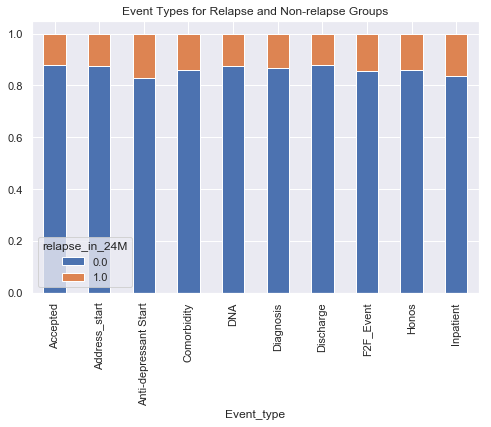

In [145]:
# Look at different Event types for relapse/non-relapse group
events = df_with_relapse.groupby('Event_type')['relapse_in_24M'].value_counts(normalize=True).unstack()
events.plot(kind='bar', stacked='True', figsize=(8,5));
plt.title('Event Types for Relapse and Non-relapse Groups');

In [146]:
# Find counts of events per patient
df_counts2 = df_with_relapse.groupby(['BrcId','relapse_in_12M','relapse_in_24M', 'relapse_in_36M']).size().reset_index()

In [147]:
# Rename index
df_counts2.rename(columns={0: 'num_events'}, inplace=True)

In [148]:
# Find summary stats of # events per patient
# Median is 9 events per patient
df_counts2.describe()

,BrcId,relapse_in_12M,relapse_in_24M,relapse_in_36M,num_events
count,1.197600e+04,11976.000000,11976.000000,11976.000000,11976.000000
mean,1.019602e+07,0.092602,0.122411,0.138694,18.083083
std,8.205475e+04,0.289886,0.327774,0.345641,25.519482
min,1.000016e+07,0.000000,0.000000,0.000000,2.000000
25%,1.015672e+07,0.000000,0.000000,0.000000,6.000000
50%,1.019409e+07,0.000000,0.000000,0.000000,9.000000
75%,1.025454e+07,0.000000,0.000000,0.000000,19.000000
max,1.035398e+07,1.000000,1.000000,1.000000,687.000000


In [149]:
# Look at number of patients with small # of events - only a few
df_counts2[df_counts2['num_events'] < 4].count()

BrcId             28
relapse_in_12M    28
relapse_in_24M    28
relapse_in_36M    28
num_events        28
dtype: int64

In [150]:
# Try different thresholds for # of events
# 82% of patients have 25 or fewer events (9774/11,971 patients)
df_counts2[df_counts2['num_events'] <=25].count()

BrcId             9774
relapse_in_12M    9774
relapse_in_24M    9774
relapse_in_36M    9774
num_events        9774
dtype: int64

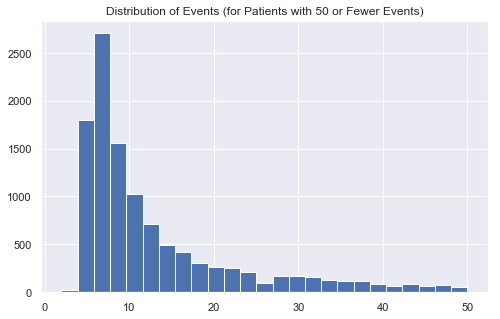

In [151]:
# Look at distribution of number of events for all patients
df_counts2[df_counts2['num_events'] <= 50]['num_events'].hist(bins = 25, figsize=(8,5));
plt.title('Distribution of Events (for Patients with 50 or Fewer Events)');

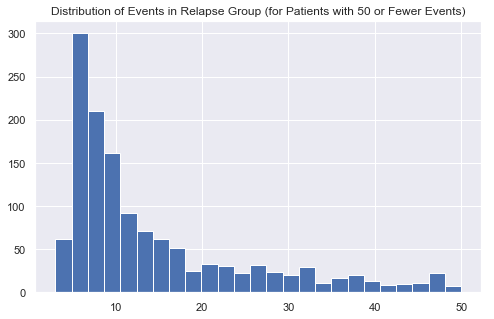

In [152]:
# Look at distribution of number of events for relapse group
df_counts2[(df_counts2['relapse_in_24M'] ==1) & (df_counts2['num_events'] <=50)]['num_events'].hist(bins = 25
                                                                                                   , figsize=(8,5));
plt.title('Distribution of Events in Relapse Group (for Patients with 50 or Fewer Events)');

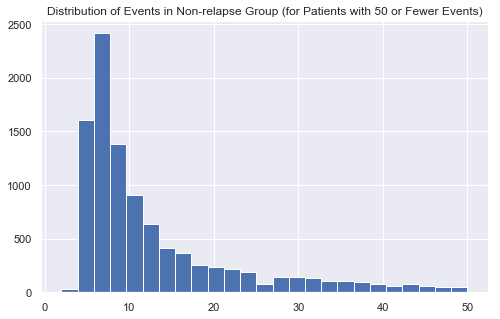

In [153]:
# Look at distribution of number of events for non-relapse group
df_counts2[(df_counts2['relapse_in_24M'] ==0) & (df_counts2['num_events'] <=50)]['num_events'].hist(bins = 25
                                                                                                   , figsize=(8,5));
plt.title('Distribution of Events in Non-relapse Group (for Patients with 50 or Fewer Events)');

In [154]:
# Try different thresholds for # of events for relapse group
# 80% of relapse group has 29 or fewer events (1175/1467 patients) 
df_counts2[(df_counts2['relapse_in_24M'] ==1) & (df_counts2['num_events'] <= 29)].count()

BrcId             1175
relapse_in_12M    1175
relapse_in_24M    1175
relapse_in_36M    1175
num_events        1175
dtype: int64

### Time series analysis

In [155]:
# Save sequential data to new df
seq_data = df.copy()

In [156]:
# Convert Date field to Datetime
seq_data['Date']= pd.to_datetime(seq_data['Date'])

In [157]:
# Re-index with Date field
seq_data = seq_data.set_index('Date')

In [158]:
# Check index
seq_data.index

DatetimeIndex(['2013-09-30', '2013-09-30', '2013-11-01', '2013-11-08',
               '2013-11-08', '2013-12-23', '2014-01-17', '2014-02-06',
               '2014-02-17', '2014-07-15',
               ...
               '2017-07-29', '2017-07-30', '2017-07-30', '2017-07-30',
               '2017-07-22', '2017-07-22', '2017-07-22', '2017-07-22',
               '2017-07-23', '2017-07-23'],
              dtype='datetime64[ns]', name='Date', length=216563, freq=None)

In [159]:
# Resample data by year
yearly = pd.Grouper(freq='Y')
resampled_yearly = (seq_data.groupby(['BrcId',yearly]).count())

In [160]:
# Yearly stats
resampled_yearly['Event_type'].describe()

count    22015.000000
mean         9.837066
std         12.841233
min          1.000000
25%          3.000000
50%          6.000000
75%         11.000000
max        217.000000
Name: Event_type, dtype: float64

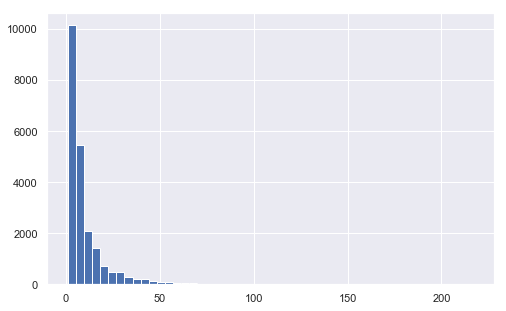

In [161]:
# Show distribution of event counts per patient per year
resampled_yearly['Event_type'].hist(bins = 50, figsize=(8,5));

In [162]:
# Resample by Quarter
quarterly = pd.Grouper(freq='Q')
resampled_quarterly = (seq_data.groupby(['BrcId',quarterly]).count())

In [163]:
# Quarterly stats
resampled_quarterly['Event_type'].describe()

count    40895.000000
mean         5.295586
std          6.573880
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        100.000000
Name: Event_type, dtype: float64

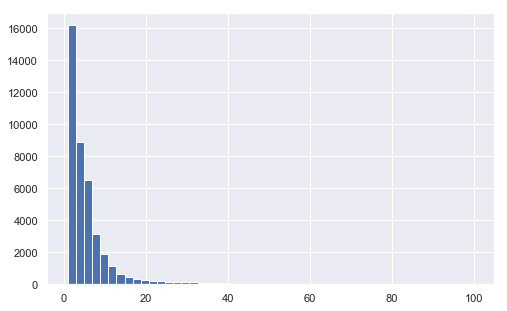

In [164]:
# Show distribution of event counts per patient per quarter
resampled_quarterly['Event_type'].hist(bins=50, figsize=(8,5));

In [165]:
# Resample by Month
monthly = pd.Grouper(freq='M')
resampled_monthly = (seq_data.groupby(['BrcId',monthly]).count())

In [166]:
# Monthly stats
resampled_monthly['Event_type'].describe()

count    70668.000000
mean         3.064513
std          3.570058
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         59.000000
Name: Event_type, dtype: float64

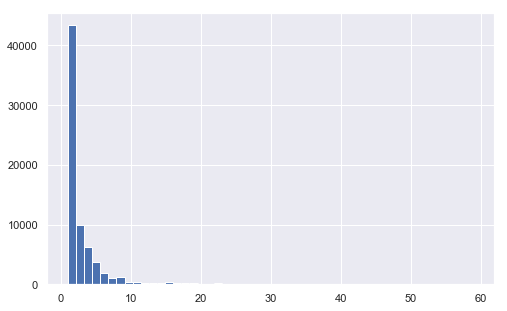

In [167]:
# Show distribution of event counts per patient per month
resampled_monthly['Event_type'].hist(bins=50, figsize=(8,5));

In [168]:
# Resample by Week
weekly = pd.Grouper(freq='W')
resampled_weekly = (seq_data.groupby(['BrcId',weekly]).count())

In [169]:
# Weekly stats
resampled_weekly['Event_type'].describe()

count    121316.000000
mean          1.785115
std           1.560732
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          20.000000
Name: Event_type, dtype: float64

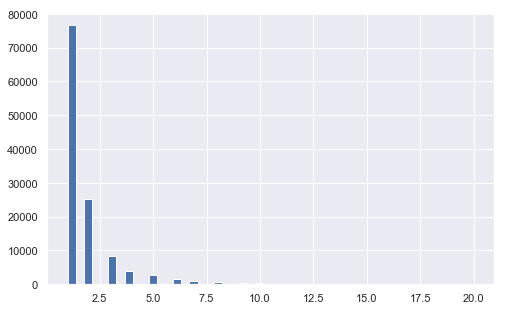

In [170]:
# Show distribution of event counts per patient per week
resampled_weekly['Event_type'].hist(bins=50, figsize=(8,5));

In [171]:
# Resample by Day
daily = pd.Grouper(freq='D')
resampled_daily = (seq_data.groupby(['BrcId',daily]).count())

In [172]:
# Daily stats
resampled_daily['Event_type'].describe()

count    160555.000000
mean          1.348840
std           0.756551
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: Event_type, dtype: float64

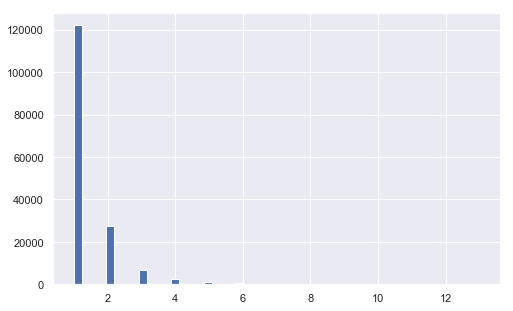

In [173]:
# Show distribution of event counts per patient per day
resampled_daily['Event_type'].hist(bins=50, figsize=(8,5));

In [174]:
# Create a second dataframe to look at min and max time gaps between subsequent events
seq_data2 = df.copy()

In [175]:
# Change Date column to Datetime
seq_data2['Date']= pd.to_datetime(seq_data2['Date'])

In [176]:
# Sort by Patient and Date and re-index
seq_data2 = seq_data2.sort_values(by=['BrcId','Date']).reset_index()

In [177]:
# Initialise date difference to 0
seq_data2['Date_diff'] = 0
seq_data2.astype({'Date_diff': 'int64'}).dtypes

index                         int64
BrcId                         int64
Date                 datetime64[ns]
Event_type                   object
GP                          float64
                          ...      
Bangladeshi                 float64
Chinese                     float64
WhiteBlackAfrican           float64
WhiteAsian                  float64
Date_diff                     int64
Length: 118, dtype: object

In [178]:
# Loop through patient sequences and calculate the date difference between subsequent events
for i in range(seq_data2.shape[0]-1):
    current_patient = seq_data2['BrcId'][i+1]
    last_patient = seq_data2['BrcId'][i]
    if current_patient != last_patient:
        seq_data2['Date_diff'][i+1] = 0
    else:
        seq_data2['Date_diff'][i+1] = (seq_data2['Date'][i+1] - seq_data2['Date'][i]).days   

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
# Look at the largest gaps
max_date_diff = seq_data2.groupby('BrcId').max()

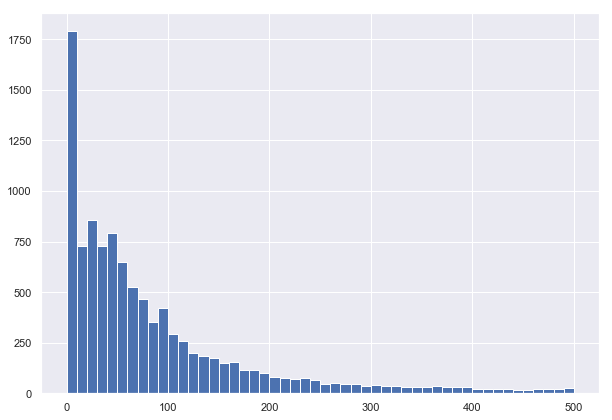

In [180]:
# Look at distribution of largest gaps
max_date_diff[max_date_diff['Date_diff']<=500]['Date_diff'].hist(bins =50, figsize=(10,7));

In [181]:
# Max gaps stats
max_date_diff['Date_diff'].describe()

count    11976.000000
mean       301.237224
std        873.043019
min          0.000000
25%         26.000000
50%         68.000000
75%        193.000000
max      40849.000000
Name: Date_diff, dtype: float64

In [182]:
# Look at possible outliers
# First, calculate inter-quartile range: 75th percentile - 25th percentile
iqr = 193 - 26

In [183]:
# Upper outliers 
upper_outliers = iqr*1.5 + 193

In [184]:
# Cutoff for upper outliers - 443.5 days
upper_outliers

443.5

In [185]:
# Lower outliers
lower_outliers = 26 - iqr*1.5

In [186]:
# Cutoff for lower outliers - negative number
lower_outliers

-224.5

In [187]:
# Get count of upper outliers
max_date_diff[max_date_diff['Date_diff']>=upper_outliers].count()

index                1907
Date                 1907
Event_type           1907
GP                   1907
Home                 1907
                     ... 
Bangladeshi          1907
Chinese              1907
WhiteBlackAfrican    1907
WhiteAsian           1907
Date_diff            1907
Length: 105, dtype: int64

In [188]:
# Get list of patient IDs with very large gaps between events - for removal in additional model
max_gap_outliers = max_date_diff.index[max_date_diff['Date_diff']>=upper_outliers]

In [189]:
# Look at the minimum gaps between events
min_date_diff = seq_data2.groupby('BrcId').min()

In [190]:
# Min gaps stats
min_date_diff['Date_diff'].describe()

count    11976.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Date_diff, dtype: float64

### Normalise continuous non-sequential data
Adapted from a blogpost by Jason Brownlee (2019) called 'How to Normalize and Standardize Time Series Data in Python'

In [191]:
# Normalise IMD score
IMD_min_ns = df_nonSeq_with_relapse['Avg_IMD_Score'].min()
IMD_max_ns = df_nonSeq_with_relapse['Avg_IMD_Score'].max()
df_nonSeq_with_relapse['Avg_IMD_Score'] = (df_nonSeq_with_relapse['Avg_IMD_Score'] - IMD_min_ns)/(IMD_max_ns - IMD_min_ns)
df_nonSeq_with_relapse['Avg_IMD_Score'].describe()

count    11656.000000
mean         0.381806
std          0.150700
min          0.000000
25%          0.270758
50%          0.387266
75%          0.499810
max          1.000000
Name: Avg_IMD_Score, dtype: float64

In [192]:
# Normalise Age
Age_min_ns = df_nonSeq_with_relapse['Age'].min()
Age_max_ns = df_nonSeq_with_relapse['Age'].max()
df_nonSeq_with_relapse['Age'] = (df_nonSeq_with_relapse['Age'] - Age_min_ns)/(Age_max_ns - Age_min_ns)
df_nonSeq_with_relapse['Age'].describe()

count    11971.000000
mean         0.316523
std          0.195923
min          0.000000
25%          0.163043
50%          0.282609
75%          0.423913
max          1.000000
Name: Age, dtype: float64

In [193]:
# Normalise Inpatient Days
Inp_min_ns = df_nonSeq_with_relapse['Num_Inpatient_Days'].min()
Inp_max_ns = df_nonSeq_with_relapse['Num_Inpatient_Days'].max()
df_nonSeq_with_relapse['Num_Inpatient_Days'] = (df_nonSeq_with_relapse['Num_Inpatient_Days'] - Inp_min_ns)/(Inp_max_ns - Inp_min_ns)
df_nonSeq_with_relapse['Num_Inpatient_Days'].describe()

count    662.000000
mean       0.097503
std        0.138811
min        0.000000
25%        0.022099
50%        0.044199
75%        0.114641
max        1.000000
Name: Num_Inpatient_Days, dtype: float64

In [194]:
# Normalise Honos Total
HT_min_ns = df_nonSeq_with_relapse['Honos_Total'].min()
HT_max_ns = df_nonSeq_with_relapse['Honos_Total'].max()
df_nonSeq_with_relapse['Honos_Total'] = (df_nonSeq_with_relapse['Honos_Total'] - HT_min_ns)/(HT_max_ns - HT_min_ns)
df_nonSeq_with_relapse['Honos_Total'].describe()

count    8727.000000
mean        0.238883
std         0.140666
min         0.000000
25%         0.135135
50%         0.216216
75%         0.324324
max         1.000000
Name: Honos_Total, dtype: float64

In [195]:
# Normalise Honos Adjusted Total
HAT_min_ns = df_nonSeq_with_relapse['Honos_Adjusted_Total'].min()
HAT_max_ns = df_nonSeq_with_relapse['Honos_Adjusted_Total'].max()
df_nonSeq_with_relapse['Honos_Adjusted_Total'] = (df_nonSeq_with_relapse['Honos_Adjusted_Total'] - HAT_min_ns)/(HAT_max_ns - HAT_min_ns)
df_nonSeq_with_relapse['Honos_Adjusted_Total'].describe()

count    8727.000000
mean        0.098047
std         0.098872
min         0.000000
25%         0.050505
50%         0.080808
75%         0.121212
max         1.000000
Name: Honos_Adjusted_Total, dtype: float64

In [196]:
# Normalise # days initial episode
DIE_min_ns = df_nonSeq_with_relapse['num_days_in_initial_episode'].min()
DIE_max_ns = df_nonSeq_with_relapse['num_days_in_initial_episode'].max()
df_nonSeq_with_relapse['num_days_in_initial_episode'] = (df_nonSeq_with_relapse['num_days_in_initial_episode'] - DIE_min_ns)/(DIE_max_ns - DIE_min_ns)
df_nonSeq_with_relapse['num_days_in_initial_episode'].describe()

count    11971.000000
mean         0.088305
std          0.119535
min          0.000000
25%          0.012879
50%          0.044697
75%          0.110795
max          1.000000
Name: num_days_in_initial_episode, dtype: float64

In [197]:
# Normalise # days initial accepted
DIA_min_ns = df_nonSeq_with_relapse['num_days_to_initial_accepted'].min()
DIA_max_ns = df_nonSeq_with_relapse['num_days_to_initial_accepted'].max()
df_nonSeq_with_relapse['num_days_to_initial_accepted'] = (df_nonSeq_with_relapse['num_days_to_initial_accepted'] - DIA_min_ns)/(DIA_max_ns - DIA_min_ns)
df_nonSeq_with_relapse['num_days_to_initial_accepted'].describe()

count    11971.000000
mean         0.000244
std          0.009160
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000068
max          1.000000
Name: num_days_to_initial_accepted, dtype: float64

In [198]:
# Normalise # days initial diagnosis
DID_min_ns = df_nonSeq_with_relapse['num_days_to_initial_diagnosis'].min()
DID_max_ns = df_nonSeq_with_relapse['num_days_to_initial_diagnosis'].max()
df_nonSeq_with_relapse['num_days_to_initial_diagnosis'] = (df_nonSeq_with_relapse['num_days_to_initial_diagnosis'] - DID_min_ns)/(DID_max_ns - DID_min_ns)
df_nonSeq_with_relapse['num_days_to_initial_diagnosis'].describe()

count    11971.000000
mean         0.033971
std          0.057969
min          0.000000
25%          0.002706
50%          0.014434
75%          0.041272
max          1.000000
Name: num_days_to_initial_diagnosis, dtype: float64

In [199]:
# Normalise # F2F events
F2F_min_ns = df_nonSeq_with_relapse['Num_F2F_events_6M'].min()
F2F_max_ns = df_nonSeq_with_relapse['Num_F2F_events_6M'].max()
df_nonSeq_with_relapse['Num_F2F_events_6M'] = (df_nonSeq_with_relapse['Num_F2F_events_6M'] - F2F_min_ns)/(F2F_max_ns - F2F_min_ns)
df_nonSeq_with_relapse['Num_F2F_events_6M'].describe()

count    10023.000000
mean         0.045521
std          0.074436
min          0.000000
25%          0.000000
50%          0.011364
75%          0.056818
max          1.000000
Name: Num_F2F_events_6M, dtype: float64

In [200]:
# Normalise # DNA events
DNA_min_ns = df_nonSeq_with_relapse['Num_DNAs_6M'].min()
DNA_max_ns = df_nonSeq_with_relapse['Num_DNAs_6M'].max()
df_nonSeq_with_relapse['Num_DNAs_6M'] = (df_nonSeq_with_relapse['Num_DNAs_6M'] - DNA_min_ns)/(DNA_max_ns - DNA_min_ns)
df_nonSeq_with_relapse['Num_DNAs_6M'].describe()

count    3767.000000
mean        0.020683
std         0.036757
min         0.000000
25%         0.000000
50%         0.017544
75%         0.035088
max         1.000000
Name: Num_DNAs_6M, dtype: float64

In [201]:
# Impute missing numerical values with 0 as most of the missing columns represent 0 counts
df_nonSeq.fillna(0, inplace=True)

In [202]:
# Impute missing numerical values with 0 as most of the missing columns represent 0 counts
df_nonSeq_with_relapse.fillna(0, inplace=True)

### Look at correlations between features and relapse

In [203]:
# Create new df for numerical values
df_nonSeq_with_relapse_num = df_nonSeq_with_relapse.copy()

In [204]:
# Remove dates and categorical columns
df_nonSeq_with_relapse_num.drop(columns=['BrcId','Gender_ID', 'ethnicitycleaned', 'Initial_primary_diagnosis',
                                        'Trimmed_Primary_Diag', 'Initial_diagnosis_date', 'Initial_accepted_date',
                                        'Initial_discharge_date_x', 'Initial_discharge_destination', 
                                        'Initial_referral_date', 'Marital_Status_ID', 'patient_created_date',
                                        'patient_updated_date', 'Honos_date', 'Honos_Scale8_Type','Honos_num',
                                        'Initial_discharge_date_y', 'spell_num', 'Initial_spell_number',
                                        'Num_days_in_remission','Num_days_in_relapse',
                                        'Rereferral_accepted_date','Rereferral_discharge_date'], inplace=True)

In [205]:
# Create correlation matrix
df_nonSeq_with_relapse_corr = df_nonSeq_with_relapse_num.corr()

In [206]:
df_nonSeq_with_relapse_corr.fillna(0, inplace=True)

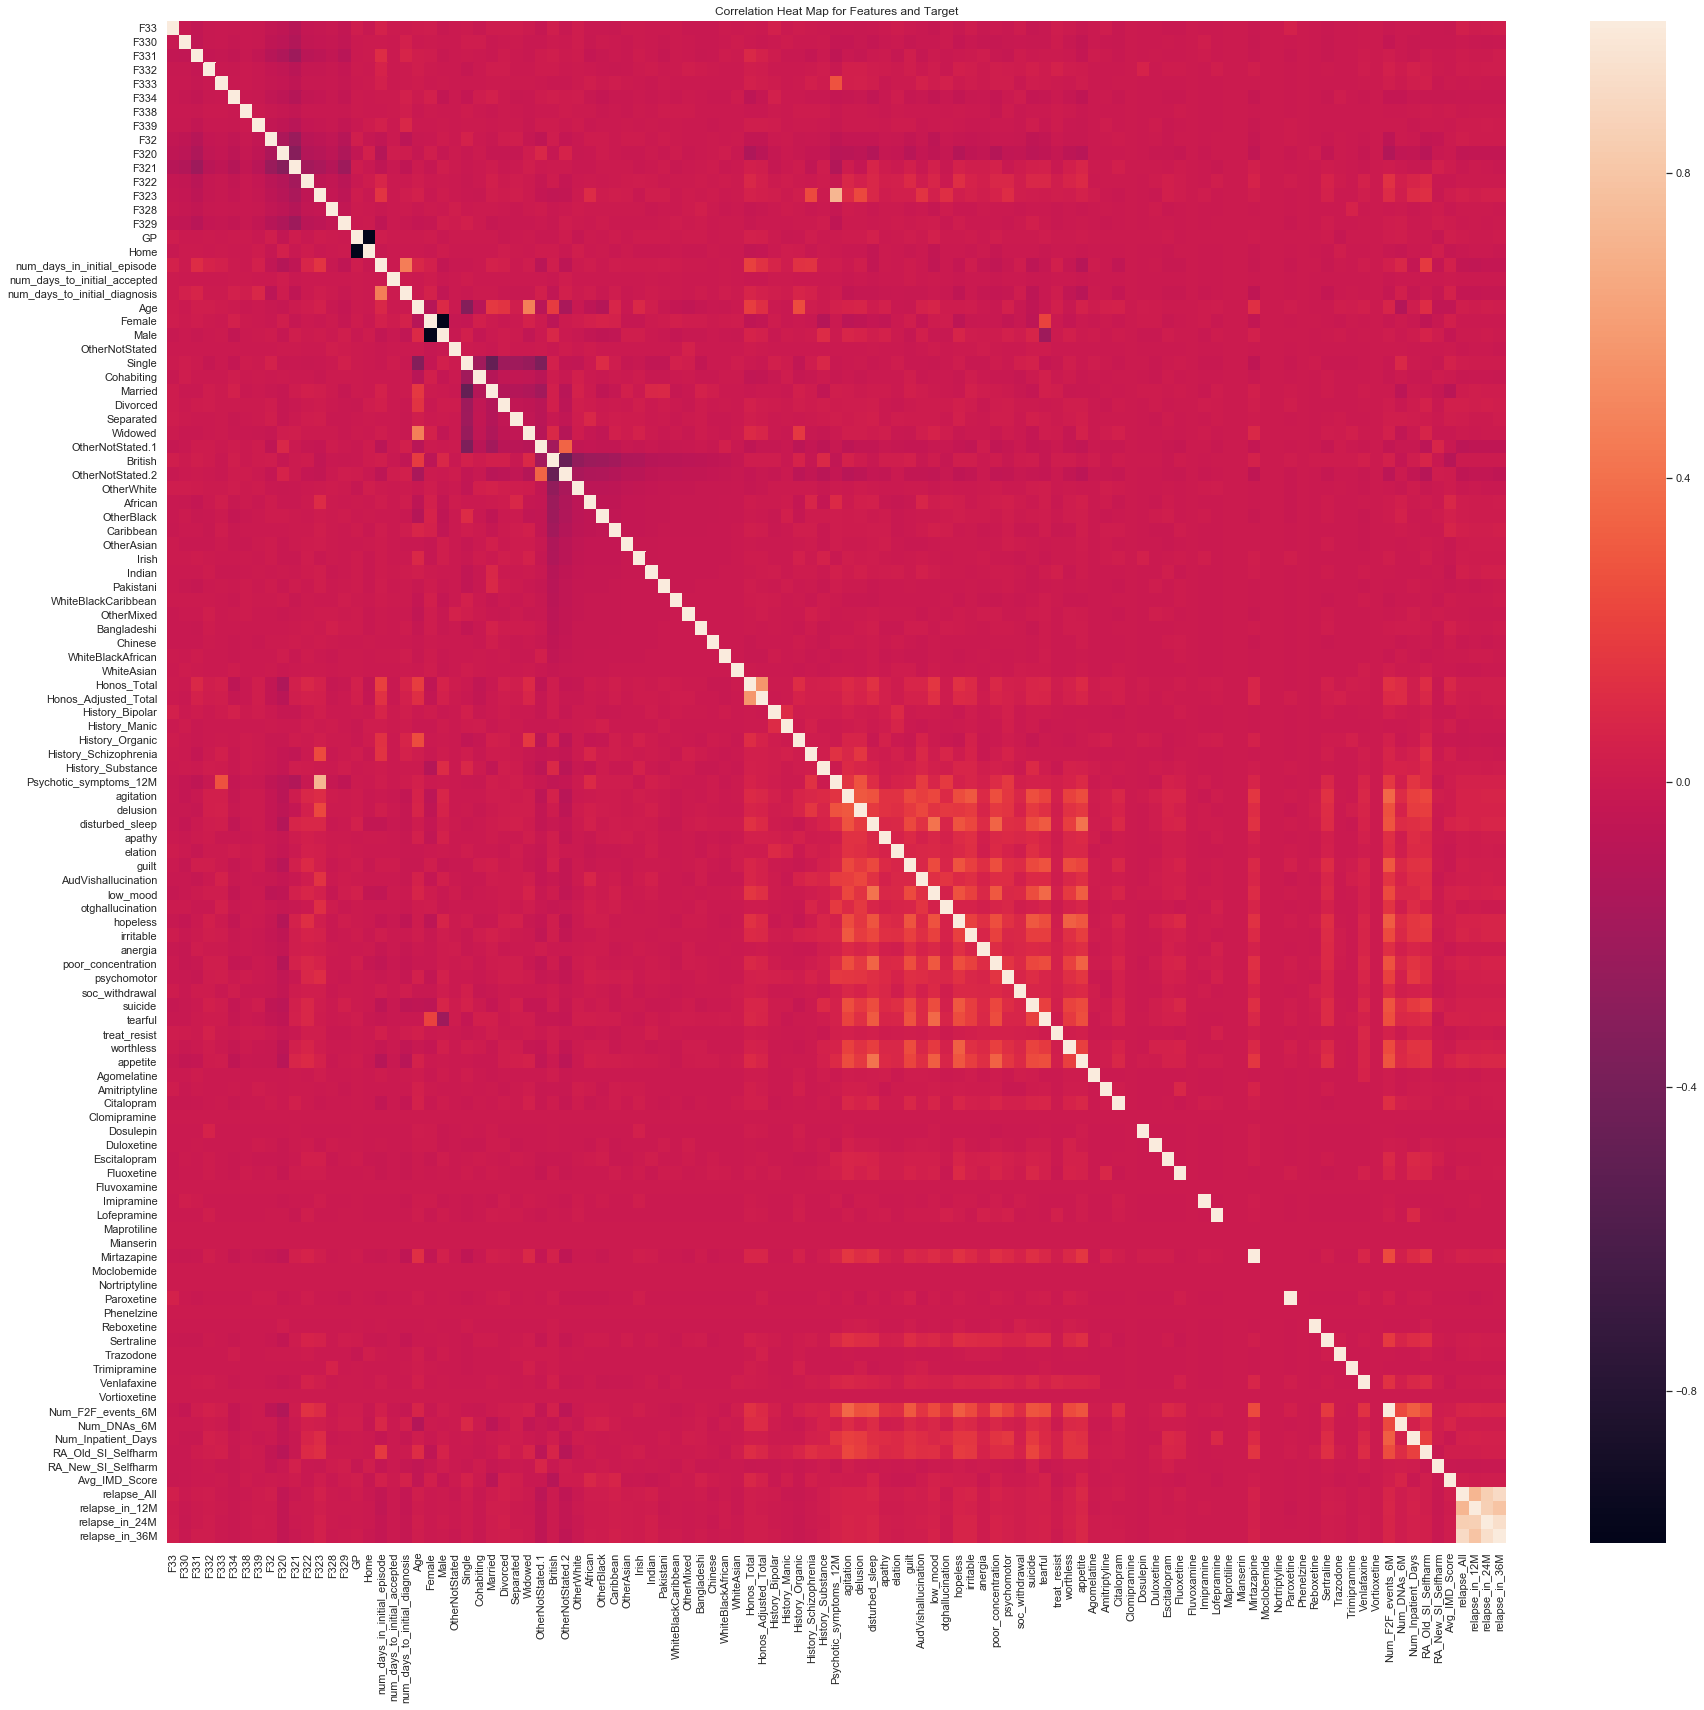

In [207]:
# Generate heatmap for feature correlation
sns.set()
plt.figure(figsize=(30, 28))
ax = sns.heatmap(df_nonSeq_with_relapse_corr)
plt.title('Correlation Heat Map for Features and Target');

## Define Target

In [208]:
# Extract unique patient list
df_patients = pd.DataFrame(df['BrcId'].unique())
df_patients.rename(columns={0:'BrcId'}, inplace=True)

In [209]:
# Check row count
df_patients.shape

(11976, 1)

In [210]:
# Load target relapse data
target_relapse = pd.read_csv('Patients_relapse_All_from2010.csv', usecols=['BrcId','relapse_in_24M'],dtype=int)

In [211]:
# Join patient list and target_relapse
target = pd.merge(df_patients, target_relapse, how='left', on=['BrcId'])

In [212]:
# Update no_relapse group with 0
target['relapse_in_24M'].fillna(0, inplace=True)

In [213]:
# Rows are unique patients
target.shape

(11976, 2)

### Export Sequential data to csv to load into model

In [214]:
# Create new df for export
df_export = df.drop(columns=['Date','Event_type'])

In [215]:
# Export data to csv
df_export.to_csv('Seq_data.csv', index=False)

In [216]:
# Export target to csv
target.iloc[:,1:].to_csv('Seq_target.csv',index=False)

### Consolidate Diagnosis and Medication columns and Export Sequential Data again
After reviewing data, the diagnosis and medication columns are very sparse as not many are populated - consolidating

In [217]:
# Create new df
df_export2 = df.copy()

In [218]:
# Create new Diagnosis column and set to -1
df_export2['Diagnosis']=-1

In [219]:
# Populate Diagnosis column with 1 where Event type is Diagnosis
df_export2['Diagnosis'][df_export2['Event_type']=='Diagnosis']=1

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [220]:
# Create new Anti-depressant column and set to -1
df_export2['Anti-depressant']=-1

In [221]:
# Populate Anti-ddepressant column with 1 where Event type is Anti-depressant Start
df_export2['Anti-depressant'][df_export2['Event_type']=='Anti-depressant Start']=1

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [222]:
# Check column count
df_export2.shape

(216563, 118)

In [223]:
# Drop diagnosis and medication one-hot encoded columns
df_export2 = df_export2.drop(columns=['Date','Event_type','F33','F330','F331','F332','F333','F334','F338','F339',
                              'F32','F320','F321','F322','F323','F328','F329', 'Agomelatine', 'Amitriptyline',
                              'Citalopram','Clomipramine','Dosulepin','Duloxetine','Escitalopram','Fluoxetine',
                              'Fluvoxamine','Imipramine','Lofepramine','Maprotiline','Mianserin','Mirtazapine',
                              'Moclobemide','Nortriptyline','Paroxetine','Phenelzine','Reboxetine','Sertraline',
                              'Trazodone','Trimipramine','Venlafaxine','Vortioxetine'])

In [224]:
# Check column count again
df_export2.shape

(216563, 77)

In [225]:
# Export final sequential data to csv
df_export2.to_csv('Seq_data_2.csv', index=False)

### Export non-Sequential data 

In [226]:
# Remove additional relapse period columns
df_nonSeq_export = df_nonSeq_with_relapse_num.drop(columns=['relapse_All', 'relapse_in_12M', 'relapse_in_36M'])

In [227]:
# Export to csv
df_nonSeq_export.to_csv('nonSeq_data.csv', index=False)

## Prepare data for Gender models
Split data into Male and Female, find best hyperparameters and run model

In [228]:
# Create dataframes for Female and Male
df_female_export = df_export2[(df_export2['Female'] ==1)]
df_male_export = df_export2[(df_export2['Male'] ==1)]

In [229]:
# Get female patient list
df_females = pd.DataFrame(df_female_export['BrcId'].unique())
df_females.rename(columns={0:'BrcId'}, inplace=True)

In [230]:
# Get male patient list
df_males = pd.DataFrame(df_male_export['BrcId'].unique())
df_males.rename(columns={0:'BrcId'}, inplace=True)

In [231]:
# Generate target data for male and female
target_female = pd.merge(df_females, target, how='inner', on=['BrcId'])
target_male = pd.merge(df_males, target, how='inner', on=['BrcId'])

In [232]:
# Export to csv
df_female_export.to_csv('Seq_data_female.csv', index=False)
df_male_export.to_csv('Seq_data_male.csv', index=False)
target_female.iloc[:,1:].to_csv('Seq_target_female.csv',index=False)
target_male.iloc[:,1:].to_csv('Seq_target_male.csv',index=False)

## Prepare data for Limited data models
Limit data by removing sequences with very high gaps between events, Accepted events (as everyone has them), grouping data on same date into same row and removing duplidate diagnosis events

In [233]:
# Check shape
df.shape

(216563, 116)

In [234]:
# Remove Accepted Events as everyone has this
df_limited_export = df[df['Event_type']!='Accepted']

In [235]:
# Check shape again
df_limited_export.shape

(204590, 116)

In [236]:
# Create Diagnosis column and set to -1
df_limited_export['Diagnosis']=-1

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
# Populate Diagnosis column with 1 where Event type is Diagnosis
df_limited_export['Diagnosis'][df_limited_export['Event_type']=='Diagnosis']=1

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:9116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [238]:
# Create Anti-depressant column and set to -1
df_limited_export['Anti-depressant']=-1

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [239]:
# Populate Anti-depressant column with 1 where Event type is Anti-depressant Start
df_limited_export['Anti-depressant'][df_limited_export['Event_type']=='Anti-depressant Start']=1

C:\Users\LDwyer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [240]:
# Remove detailed Diagnosis and Anti-depressant columns
df_limited_export = df_limited_export.drop(columns=['F33','F330','F331','F332','F333','F334','F338',
                              'F339','F32','F320','F321','F322','F323','F328','F329', 'Agomelatine', 'Amitriptyline',
                              'Citalopram','Clomipramine','Dosulepin','Duloxetine','Escitalopram','Fluoxetine',
                              'Fluvoxamine','Imipramine','Lofepramine','Maprotiline','Mianserin','Mirtazapine',
                              'Moclobemide','Nortriptyline','Paroxetine','Phenelzine','Reboxetine','Sertraline',
                              'Trazodone','Trimipramine','Venlafaxine','Vortioxetine'])

In [241]:
# Next, remove patients with very large max gaps between events
df_limited_export = df_limited_export[~df_limited_export['BrcId'].isin(max_gap_outliers)]

In [242]:
# Check shape again
df_limited_export.shape

(166232, 79)

In [243]:
# Next, group events for same patient on same day into same row
df_limited_export = df_limited_export.groupby(['BrcId','Date']).max()

In [244]:
# Reset Index
df_limited_export = df_limited_export.reset_index()

In [245]:
# Check shape
# Honos individual questions are removed as they are string fields
df_limited_export.shape

(127632, 67)

In [246]:
# Drop Date and Event_type columns
df_limited_export = df_limited_export.drop(columns=['Date','Event_type'])

In [247]:
# Get list of patients who have limited events
df_limited_patients = pd.DataFrame(df_limited_export['BrcId'].unique())
df_limited_patients.rename(columns={0:'BrcId'}, inplace=True)

In [248]:
# Create target dataframe
target_limited = pd.merge(df_limited_patients, target, how='inner', on=['BrcId'])

In [249]:
# Check shape
target_limited.shape

(10069, 2)

In [250]:
# Export to csv
df_limited_export.to_csv('Seq_data_limited.csv', index=False)
target_limited.iloc[:,1:].to_csv('Seq_target_limited.csv',index=False)